In [18]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

=== Linear Regression Results ===
R² Score        : -0.0003
RMSE            : 20.34
Accuracy (scaled): 70.52%


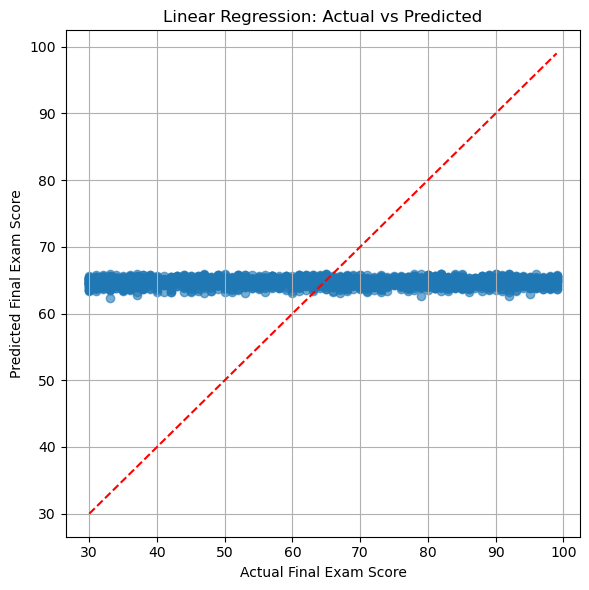

In [19]:
df = pd.read_csv("personalized_learning_dataset.csv")

df['Time_per_Quiz'] = df['Time_Spent_on_Videos'] / (df['Quiz_Attempts'] + 1)

selected_features = [
    'Quiz_Scores',
    'Assignment_Completion_Rate',
    'Time_per_Quiz',
    'Education_Level',
    'Gender',
    'Feedback_Score'
]

target = 'Final_Exam_Score'

categorical = ['Education_Level', 'Gender']
numerical = ['Quiz_Scores', 'Assignment_Completion_Rate', 'Time_per_Quiz', 'Feedback_Score']

df_encoded = pd.get_dummies(df[selected_features], columns=categorical, drop_first=True)

X = df_encoded
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
score_range = y.max() - y.min()
relative_accuracy = max(0, 1 - rmse / score_range) * 100

print("=== Linear Regression Results ===")
print(f"R² Score        : {r2:.4f}")
print(f"RMSE            : {rmse:.2f}")
print(f"Accuracy (scaled): {relative_accuracy:.2f}%")

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Final Exam Score")
plt.ylabel("Predicted Final Exam Score")
plt.title("Linear Regression: Actual vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()